In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

from pqcd.utils import (
    to_nucleons_per_cubic_femtometre,
    nsat,
)

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
collated_eos_gp0 = pd.read_csv(
    '../data/eos-draws-default/eos-draws-default.csv',
    index_col='eos'
)
collated_eos_gp0_with_ntov = pd.read_csv(
    '../data/eos-draws-default/collated_np_all_post.csv',
    index_col='eos'
)
collated_eos_gp0['ntov'] = to_nucleons_per_cubic_femtometre(
    collated_eos_gp0_with_ntov['rhoc(M@Mmax)']
)

collated_eos_gp0['R0.5'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_M/radius_0.5.dat'
)
collated_eos_gp0['R1.4'] = collated_eos_gp0_with_ntov['R(M=1.4)']
collated_eos_gp0['R2'] = collated_eos_gp0_with_ntov['R(M=2.0)']

collated_eos_gp0['ptov'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_ntov.dat'
)
collated_eos_gp0['etov'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/energy_density_ntov.dat'
)

collated_eos_gp0['p2'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_02nsat.dat'
)
collated_eos_gp0['p6'] = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_06nsat.dat'
)

astro_weights_gp0 = np.exp(
    collated_eos_gp0.logweight_total - collated_eos_gp0.logweight_total.max()
).values
astro_weights_gp0 /= max(astro_weights_gp0)

ntov_marg_weights_gp0 = np.loadtxt(
    '../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat'
)

In [3]:
epsilon_05 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_M/central_energy_density_0.5.dat'
)
p_05 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_M/central_pressure_0.5.dat'
)

In [4]:
gp0_stacked = np.vstack([
    collated_eos_gp0['R0.5'].values,
    epsilon_05,
    p_05,
    p_05/epsilon_05,
]).T

In [5]:
ranges = [
    (6,18),
    (0, 0.5),
    (0, 0.05),
    (0, 0.1),
]

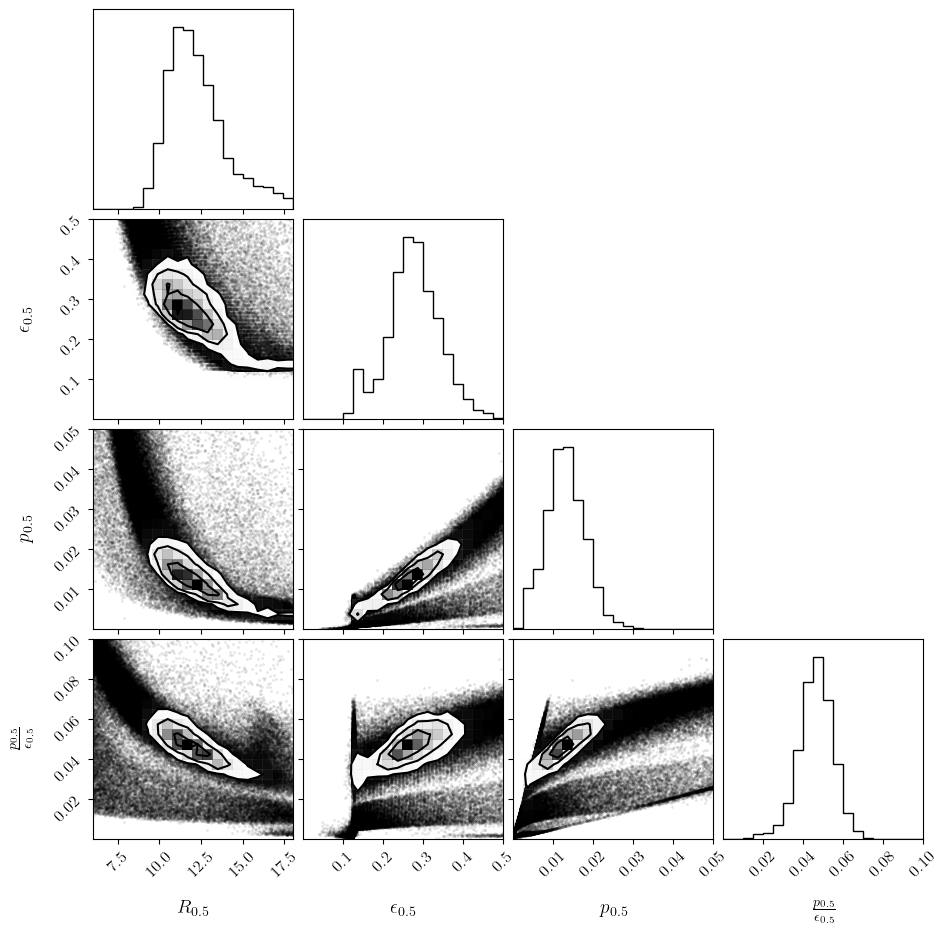

In [6]:
corner.corner(
    gp0_stacked,
    labels=[
        r'$R_{0.5}$',
        r'$\epsilon_{0.5}$',
        r'$p_{0.5}$',
        r'$\frac{p_{0.5}}{\epsilon_{0.5}}$'
    ],
    weights=astro_weights_gp0,
    range=ranges,
);

In [7]:
epsilon_2 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_M/central_energy_density_2.0.dat'
)
p_2 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_M/central_pressure_2.0.dat'
)

In [8]:
gp0_stacked = np.vstack([
    collated_eos_gp0['R2'].values,
    epsilon_2,
    p_2,
    p_2/epsilon_2,
]).T

In [9]:
ranges = [
    (6,18),
    (0.2, 1.2),
    (0, 0.8),
    (0, 0.5),
]

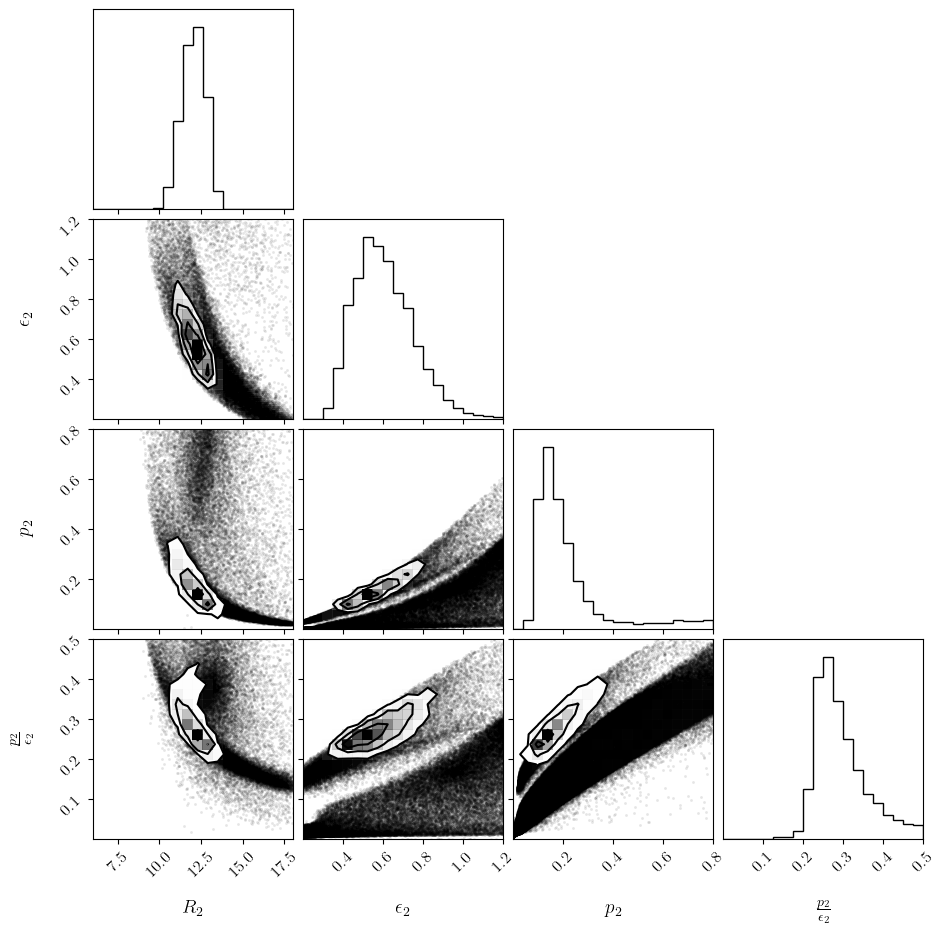

In [10]:
corner.corner(
    gp0_stacked,
    labels=[
        r'$R_{2}$',
        r'$\epsilon_{2}$',
        r'$p_{2}$',
        r'$\frac{p_{2}}{\epsilon_{2}}$'
    ],
    weights=astro_weights_gp0,
    range=ranges,
);

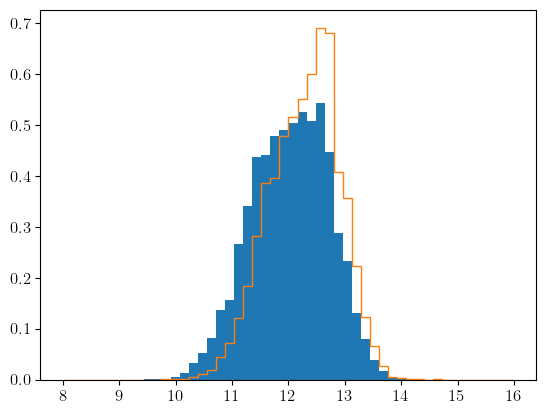

In [11]:
fig, ax = plt.subplots()

ax.hist(
    collated_eos_gp0['R2'], 
    weights=astro_weights_gp0,
    bins=50,
    range=(8,16),
    density=True
)

ax.hist(
    collated_eos_gp0['R2'], 
    weights=astro_weights_gp0*ntov_marg_weights_gp0,
    bins=50,
    range=(8,16),
    histtype='step',
    density=True
);

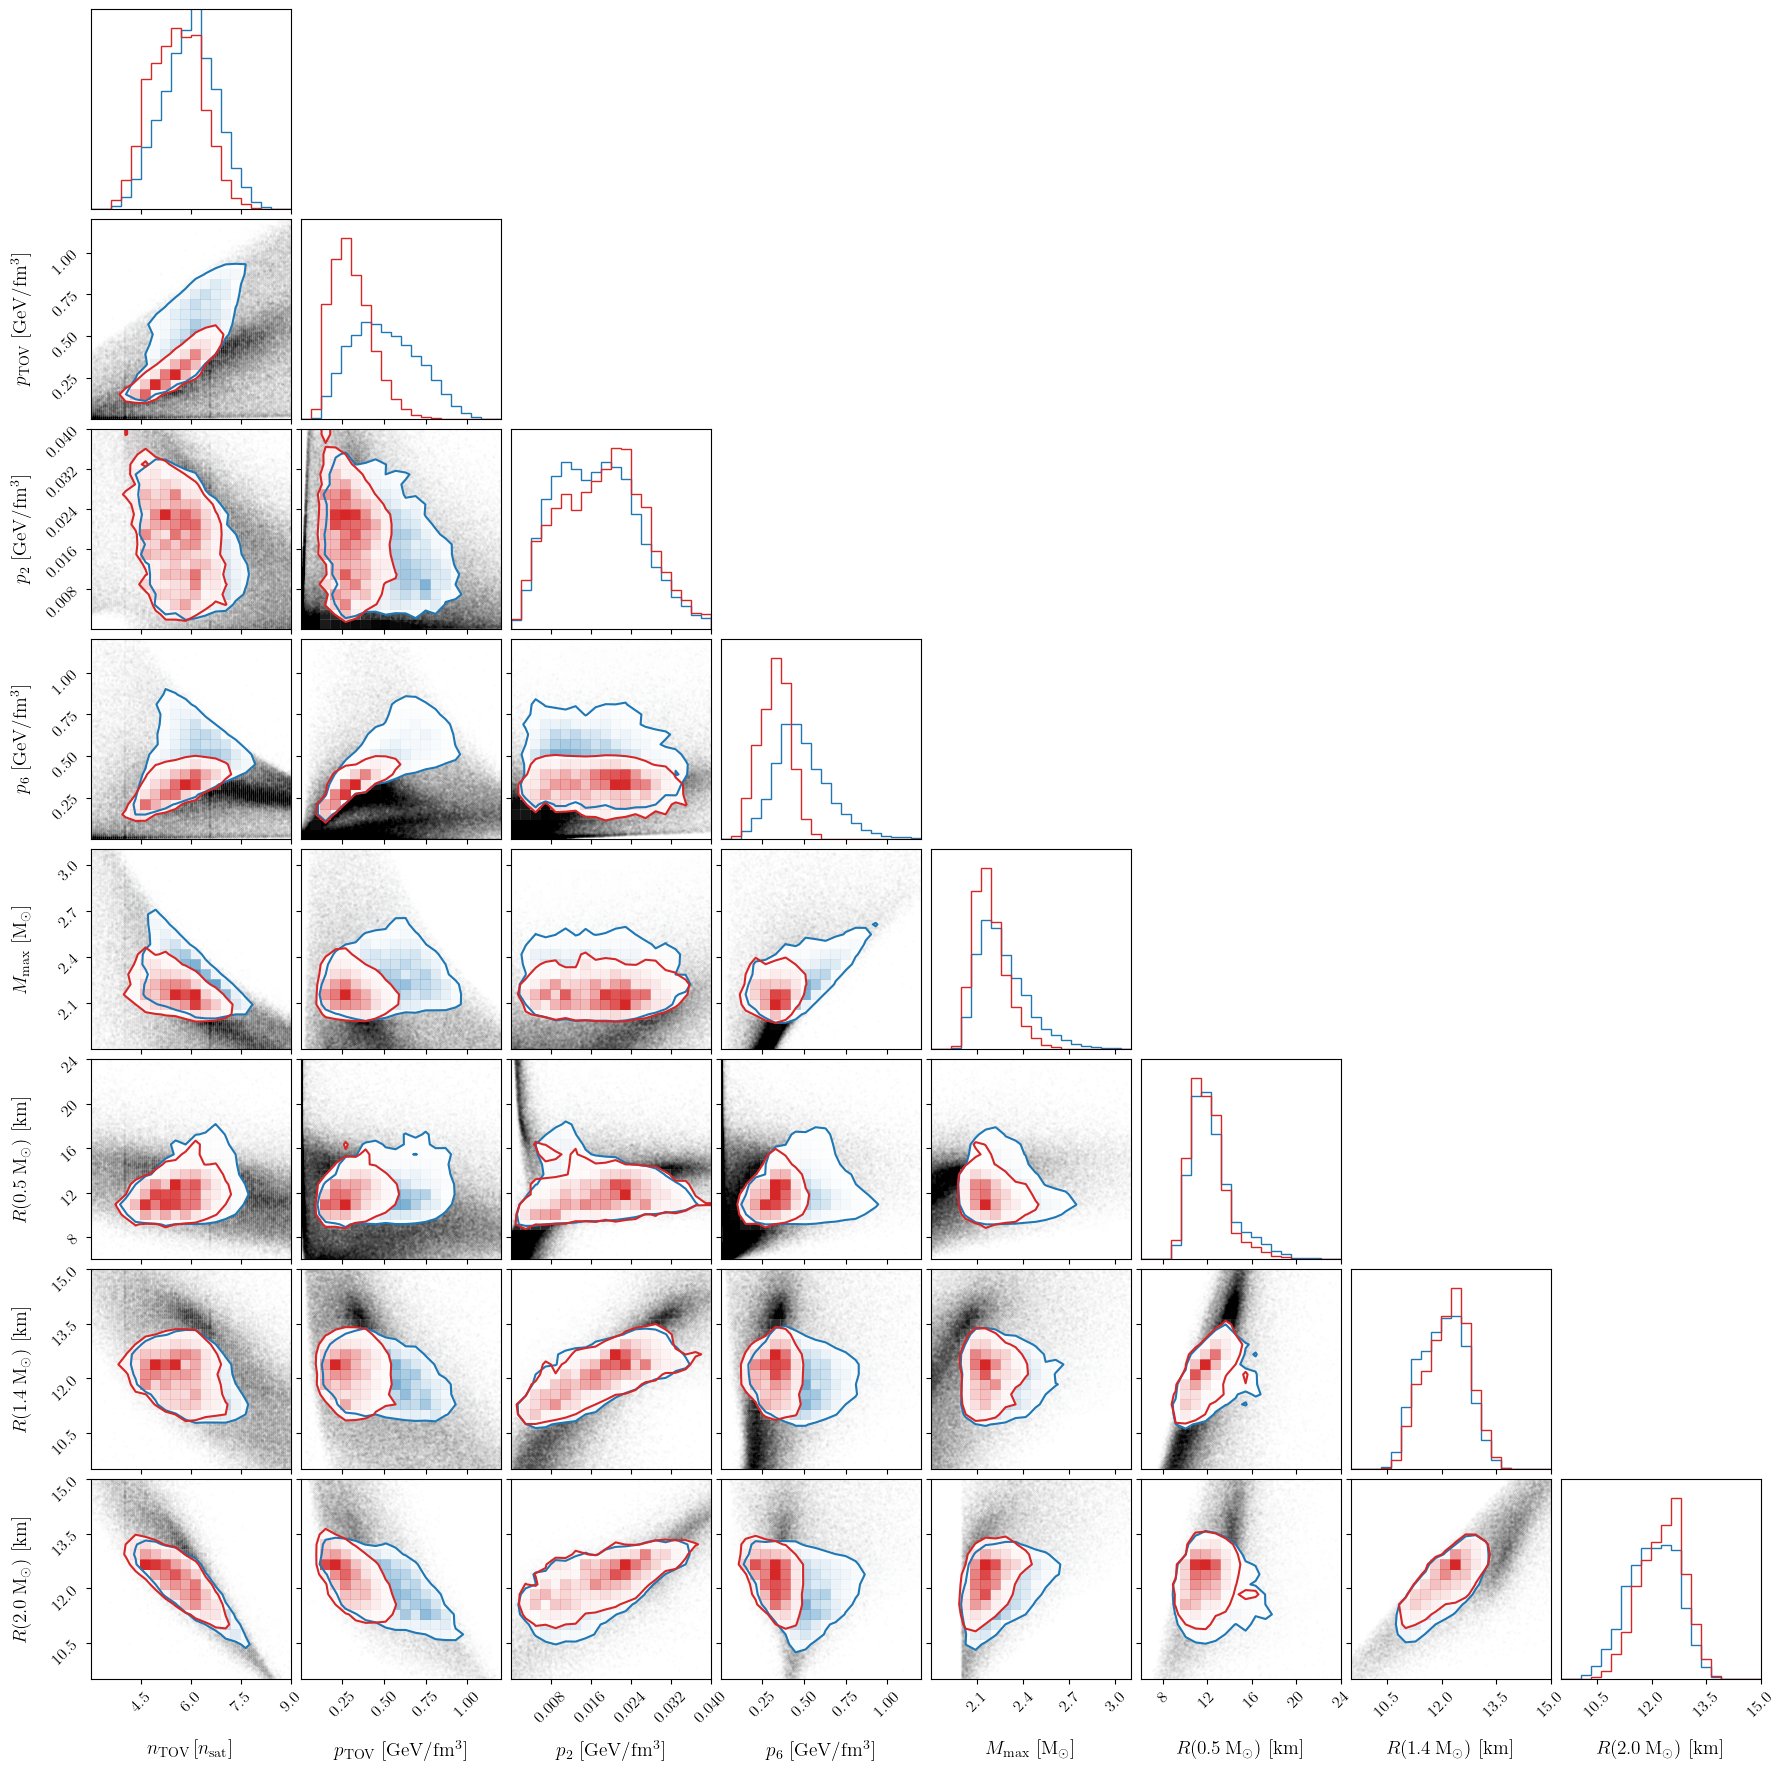

In [12]:
stacked = np.vstack([
    collated_eos_gp0['ntov']/nsat,
    collated_eos_gp0['ptov'],
    collated_eos_gp0['p2'],
    collated_eos_gp0['p6'],
    # collated_eos_gp0['etov'],
    collated_eos_gp0['Mmax'],
    collated_eos_gp0['R0.5'],
    collated_eos_gp0['R1.4'],
    collated_eos_gp0['R2'],
]).T

labels = [
    '$n_\mathrm{TOV}\,[n_\mathrm{sat}]$',
    '$p_\mathrm{TOV}$ [GeV/fm$^3$]',
    '$p_2$ [GeV/fm$^3$]',
    '$p_6$ [GeV/fm$^3$]',
    # '$\epsilon_\mathrm{TOV}$ [GeV/fm$^3$]',
    '$M_\mathrm{max}$ [M$_\odot$]',
    '$R(0.5\, \mathrm{M}_\odot)$ [km]',
    '$R(1.4\, \mathrm{M}_\odot)$ [km]',
    '$R(2.0\, \mathrm{M}_\odot)$ [km]',
]

ranges = [
    (3, 9),
    (0, 1.2),
    (0, 0.04),
    (0, 1.2),
    # (0.6, 1.8),
    (1.8, 3.1),
    (6, 24),
    (9.5, 15),
    (9.5, 15),
]

fig = corner.corner(
    stacked,
    labels=labels,
    levels=[0.9],
    weights=astro_weights_gp0,
    plot_datapoints=True,
    range=ranges,
    color='C0',
    hist_kwargs={'density': True},
    data_kwargs={'color':'k', 'alpha':0.01},
)

corner.corner(
    stacked,
    labels=labels,
    levels=[0.9],
    weights=astro_weights_gp0*ntov_marg_weights_gp0,
    plot_datapoints=False,
    range=ranges,
    color='C3',
    fig=fig,
    hist_kwargs={'density': True},
);